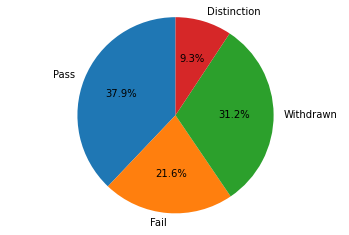

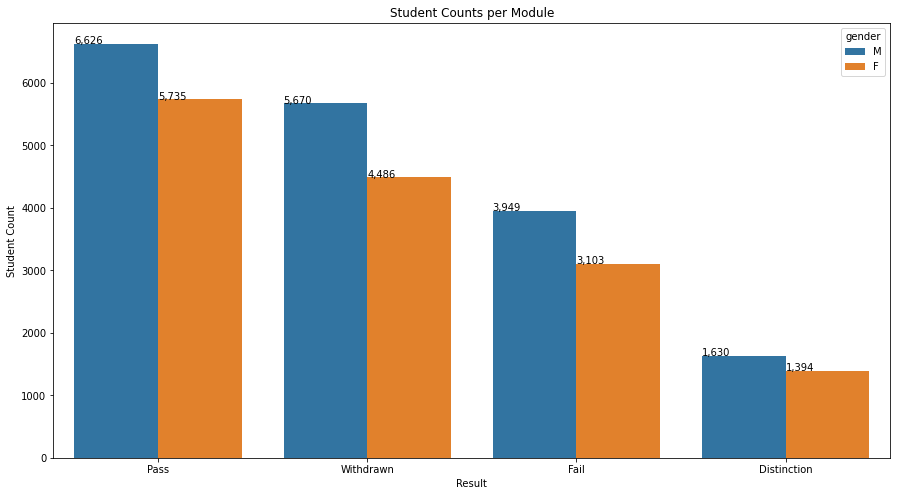

In [1]:
from functions import *
from ipynb.fs.full.Student_Information import stud_info
from ipynb.fs.full.Assessments import merged_assessments

# VLE
---
## VLE
---

The VLE dataframe contains information about materials available on the Virtual Learning Environment.

In [2]:
# show first 5 of vle dataframe
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


---

#### VLE Information

**Size**

In [3]:
## return a dataframe of column and row count
get_size(vle)

,Count
Columns,6
Rows,6364


In [4]:
## store the size of vle's columns
vle_cols = len(vle.columns)
## store the size of vle's rows
vle_rows = len(vle)
md(f'''
VLE has {vle_cols} features and {"{:,}".format(vle_rows)} rows which represent the online resources we have data for.
''')


VLE has 6 features and 6,364 rows which represent the online resources we have data for.


---

#### VLE Contents

* **id_site**: The site ID is the unique identifier for the online resource.
* **code_module**: The code module is the module the resource is associated with.
* **code_presentation**: The code presentation represents the time the module was held at.
* **activity_type**: The activity type is the type of online material.
* **week_from**: The week from is the week the material was intended to be used from.
    - week_from will not be used in our analysis due to it being irrelevant information and will be dropped.
* **week_to**: The week to is the week the material was intended to be used until.
    - week_to will not be used in our analysis due to it being irrelevant information and will be dropped.

* column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation

In [5]:
# make a dictionary of columns mapping to their new name
vle_rename = {'code_module':'module', 'code_presentation':'presentation'}
# rename columns in assessments based on dictionary
vle = vle.rename(columns=vle_rename)

In [6]:
## dropping week_to and week_from from VLE dataframe
vle = vle.drop(columns=['week_from', 'week_to'])

# Student VLE
---

The Student VLE Dataframe contains information about student interactions with the online resources in the Virtual Learning Environment

In [7]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


**Size**

In [8]:
get_size(student_vle)

,Count
Columns,6
Rows,10655280


In [9]:
# store the size of student_vle's columns
stud_vle_cols = len(student_vle.columns)
# store the size of student_vle's rows
stud_vle_rows = len(student_vle)
md(f'''
Student VLE has {stud_vle_cols} features and {"{:,}".format(stud_vle_rows)} rows which represent the student resource interactions we have data for.
''')


Student VLE has 6 features and 10,655,280 rows which represent the student resource interactions we have data for.


---

## Student VLE Contents

* **code_module**: The code module is the module the resource and student are associated with.
* **code_presentation**: The code presentation represents the time the module was held at.
* **id_site**: The site ID is the unique identifier for the online resource with which the student engaged.
* **date**: The date represents the date that the student engaged with the material relevant to the start date of the module.
* **sum_click**: The sum click represents the number of clicks the student made on that day.

* column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation

In [10]:
# make a dictionary of columns mapping to their new name
stud_vle_rename = {'code_module':'module', 'code_presentation':'presentation'}
# rename columns in assessments based on dictionary
student_vle = student_vle.rename(columns=stud_vle_rename)

---

## VLE Information

**Data Types**

In [11]:
# return a dataframe of vle's columns' data types
get_dtypes(vle)

index,Type
id_site,int64
module,object
presentation,object
activity_type,object


* `id_site` is categorical and will need to be changed into a `string`
* `object` datatypes will again be turned into strings

In [12]:
# change id_site to string type
vle['id_site'] = vle['id_site'].astype(str)
# convert all other types to ideal typings for pandas
vle = vle.convert_dtypes()
# show new datatypes dataframe
get_dtypes(vle)

index,Type
id_site,string
module,string
presentation,string
activity_type,string


**Null Values**

In [13]:
# return a dataframe of null values if any
null_vals(vle)

index,Null Values
id_site,0
module,0
presentation,0
activity_type,0


We have no null values in VLE

**Duplicate Values**

In [14]:
# return a dataframe of duplicate rows if any
get_dupes(vle)

There are no Duplicate Values

**Unique Value Counts**

In [15]:
# return a dataframe of counts of unique values per column
count_unique(vle)

index,Count
id_site,6364
module,7
presentation,4
activity_type,20


**Unique Categorical Values**

In [16]:
# return a dataframe of unique categorical variables' values
unique_vals(vle)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"
activity_type,"['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary', 'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate', 'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki', 'dualpane', 'repeatactivity', 'folder', 'htmlactivity']"


In [17]:
activity_count = vle['activity_type'].nunique()
id_site_count = vle['id_site'].nunique()
md(f'''
We have {activity_count} different types activities students could have participated in and {"{:,}".format(id_site_count)} unique activities within these types
''')


We have 20 different types activities students could have participated in and 6,364 unique activities within these types


---

## Student VLE Information

**Data Types**

In [18]:
get_dtypes(student_vle)

index,Type
module,object
presentation,object
id_student,int64
id_site,int64
date,int64
sum_click,int64


id_student and id_site are categorical and must be converted to strings.

In [19]:
# convert id_site and id_student to strings
student_vle = student_vle.astype({'id_site':str, 'id_student':str})
get_dtypes(student_vle)

index,Type
module,object
presentation,object
id_student,object
id_site,object
date,int64
sum_click,int64


**Null Values**

In [20]:
null_vals(student_vle)

index,Null Values
module,0
presentation,0
id_student,0
id_site,0
date,0
sum_click,0


There are no null values in student_vle

**Duplicate Values**

In [21]:
duplicates = get_dupes(student_vle)
duplicates.head()

,module,presentation,id_student,id_site,date,sum_click
2,AAA,2013J,28400,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
180,AAA,2013J,77367,546652,-10,4
193,AAA,2013J,94961,546652,-10,2
442,AAA,2013J,248270,546652,-10,4


In [22]:
md(f'''
There are {"{:,}".format(len(duplicates))} duplicated rows which are merely the same students on the same day, interacting with the same material in the same way, which is to be expected.
''')


There are 787,170 duplicated rows which are merely the same students on the same day, interacting with the same material in the same way, which is to be expected.


**Unique Value Counts**

In [23]:
count_unique(student_vle)

index,Count
module,7
presentation,4
id_student,26074
id_site,6268
date,295
sum_click,498


In [24]:
unique_students = student_vle['id_student'].nunique()
si_unique_students = student_info['id_student'].nunique()
md(f'''
There are {"{:,}".format(unique_students)} in the student_vle out of the {"{:,}".format(si_unique_students)} 
students we have in student info. So {"{:,}".format(si_unique_students - unique_students)} students from student info do not have online interaction data.
''')


There are 26,074 in the student_vle out of the 28,785 
students we have in student info. So 2,711 students from student info do not have online interaction data.


**Numerical Values**

In [25]:
student_vle.describe().round(1)

,date,sum_click
count,10655280.0,10655280.0
mean,95.2,3.7
std,76.1,8.8
min,-25.0,1.0
25%,25.0,1.0
50%,86.0,2.0
75%,156.0,3.0
max,269.0,6977.0


## Merged VLE and Student VLE Dataframe
---

We will combine the student_vle and vle dataframes to have the student data mapped to the resource data

In [28]:
# merging vle & student vle with a full outer join on common columns
merged_vle = student_vle.merge(vle, how='outer', on=['id_site', 'module', 'presentation'],indicator=True)
merged_vle.head()

,module,presentation,id_student,id_site,date,sum_click,activity_type,_merge
0,AAA,2013J,28400,546652,-10.0,4.0,forumng,both
1,AAA,2013J,28400,546652,-10.0,1.0,forumng,both
2,AAA,2013J,28400,546652,-10.0,1.0,forumng,both
3,AAA,2013J,28400,546652,-10.0,8.0,forumng,both
4,AAA,2013J,30268,546652,-10.0,3.0,forumng,both


The added merge column tells us if the data maps perfectly to both dataframes, or if it is only found on the right or left side, the right side in this case being the VLE dataframe and the left side being the student_VLE dataframe

In [29]:
# makes a dataframe containing only entries where _merge value is not both.
vle_only = merged_vle.loc[merged_vle['_merge'] != 'both']
vle_only.head()

,module,presentation,id_student,id_site,date,sum_click,activity_type,_merge
10655280,AAA,2013J,NaN,546897,NaN,NaN,url,right_only
10655281,AAA,2013J,NaN,546872,NaN,NaN,subpage,right_only
10655282,AAA,2014J,NaN,1032910,NaN,NaN,url,right_only
10655283,AAA,2014J,NaN,1072237,NaN,NaN,url,right_only
10655284,AAA,2014J,NaN,1027118,NaN,NaN,url,right_only


In [30]:
unvisited_sites_count = len(vle_only)
md(f'''
In this case the data either maps perfectly to both or is only found on the right hand side, or the VLE dataframe. These {unvisited_sites_count} 
entries represent materials which we have no student activity associated with which can be dropped along with the _merge column 
which will have no more interesting information.
''')


In this case the data either maps perfectly to both or is only found on the right hand side, or the VLE dataframe. These 96 
entries represent materials which we have no student activity associated with which can be dropped along with the _merge column 
which will have no more interesting information.


In [31]:
# drop rows which have NaN values for id_student
merged_vle = merged_vle.dropna(subset=['id_student'])

# drop _merge column
merged_vle = merged_vle.drop(columns=['_merge'])

# reset index
merged_vle.reset_index(drop=True).head()

,module,presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10.0,4.0,forumng
1,AAA,2013J,28400,546652,-10.0,1.0,forumng
2,AAA,2013J,28400,546652,-10.0,1.0,forumng
3,AAA,2013J,28400,546652,-10.0,8.0,forumng
4,AAA,2013J,30268,546652,-10.0,3.0,forumng


**Aggregating Clicks**

* It would be interesting for the student info and assessments dataframes to have the total clicks and average number of clicks per day

**Number of activity types**

* We are going to remove activity_type for now. If sum_clicks overall ends up being a good predictor of how a student does, we will add it back.
* We will remove id_site for now since it does not add any information to the resource it maps to.
* We will add a column avg_click representing the students average clicks per day.

In [34]:
# removing activity_type and id_site columns
agg_clicks = merged_vle.drop(columns=['activity_type', 'id_site'])

**VLE with clicks per student per module aggregated**

In [35]:
agg_clicks['avg_click'] = agg_clicks['sum_click']
# gets sum click as total for the whol module. Removes date since no longer relevant.
aggregates = {'sum_click':'sum', 'module':'first', 'presentation':'first', 'avg_click':'mean'}

agg_clicks = agg_clicks.groupby(['id_student']).aggregate(aggregates).reset_index()
agg_clicks['avg_click'] = agg_clicks['avg_click'].round(2)
# change id_student to int and then object to remove the .0
agg_clicks = agg_clicks.astype({'id_student': str})

In [36]:
agg_clicks = agg_clicks[['module', 'presentation', 'id_student', 'sum_click', 'avg_click']]

In [37]:
agg_clicks

,module,presentation,id_student,sum_click,avg_click
0,FFF,2013J,100064,6514.0,3.99
1,BBB,2013J,100282,42.0,2.62
2,DDD,2014J,100561,950.0,2.04
3,CCC,2014B,100621,59.0,2.81
4,FFF,2014B,1006742,2421.0,3.67
...,...,...,...,...,...
26069,DDD,2014B,997948,61.0,1.79
26070,BBB,2014B,99799,553.0,2.25
26071,AAA,2014J,998493,10464.0,5.07
26072,FFF,2013B,999174,6307.0,2.86


**Merge with Student Info Dataframe**

Finally, we will merge the merged VLE dataframe with the Student info dataframe to ensure wwe are only working with students who were not previously eliminated due to dropping out before the first day or for being on higher than their first attempt

**Merged VLE and Student Info Dataframes**

In [ ]:
# outer merge of stud_info and vle dataframes on common columns
stud_info = stud_info.merge(agg_clicks, how='outer', on=['id_student', 'presentation', 'module'],indicator=True)

In [40]:
# show head of resulting dataframe
stud_info.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,sum_click,avg_click,_merge
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,False,0,240,Pass,-159,<NA>,934.0,4.77,both
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,False,0,60,Pass,-53,<NA>,1435.0,3.34,both
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,True,0,60,Withdrawn,-92,12,281.0,3.70,both
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,False,0,60,Pass,-52,<NA>,2158.0,3.25,both
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,False,0,60,Pass,-176,<NA>,1034.0,2.94,both


For the `_merge` column for this dataframe, `left_only tells` us that the data is only found in student info, and right only tells us the data is only found in VLE. There are no entries found only in VLE and so we will look at the students who have no click data.

In [46]:
only_stud_info= stud_info.loc[stud_info['_merge'] == 'left_only']
only_stud_info.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,sum_click,avg_click,_merge
125,AAA,2013J,292923,South East Region,90-100%,35-55,F,A Level or Equivalent,False,0,180,Withdrawn,-162,-121,NaN,NaN,left_only
198,AAA,2013J,405961,Scotland,90-100%,0-35,M,A Level or Equivalent,True,0,240,Withdrawn,-170,-100,NaN,NaN,left_only
298,AAA,2013J,2318055,Wales,90-100%,35-55,M,A Level or Equivalent,False,0,60,Withdrawn,-56,-19,NaN,NaN,left_only
299,AAA,2013J,2324976,Scotland,90-100%,35-55,F,HE Qualification,False,0,60,Withdrawn,-101,-50,NaN,NaN,left_only
307,AAA,2013J,2365101,South East Region,20-30%,0-35,M,HE Qualification,False,0,300,Withdrawn,-129,-80,NaN,NaN,left_only


In [49]:
md(f'''
We have {"{:,}".format(len(only_stud_info))} values in only student_info, which is how many students for whom we have no click data.
''')


We have 6,519 values in only student_info, which means we have students for whom we have no click data.


**Merge with Assessments Dataframe**

Finally we will be creating a merged dataframe of the the merged vle and student info and assessments dataframes. This is so that we can attempt to predict scores based on number of clicks.

In [70]:
merged_assessments = merged_assessments.drop(columns='_merge')
merged_assessments = merged_assessments.merge(agg_clicks, how='outer', on=['module', 'presentation', 'id_student'],indicator=True)
merged_assessments.head()

ValueError: Cannot use name of an existing column for indicator column

In this case a `_merge` result of `left_only` indicates the student entry was only found in assessments.

In [68]:
only_assessments = merged_assessments.loc[merged_assessments['_merge'] == 'left_only']
only_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score,module,presentation,assessment_type,date,weight,module_presentation,sum_click,avg_click,_merge
1671,1758,603861,-1,1,61,AAA,2014J,TMA,19.0,10.0,AAA2014J,NaN,NaN,left_only
1672,1759,603861,-1,1,56,AAA,2014J,TMA,54.0,20.0,AAA2014J,NaN,NaN,left_only
1673,1760,603861,-1,1,58,AAA,2014J,TMA,117.0,20.0,AAA2014J,NaN,NaN,left_only
1674,1761,603861,-1,1,69,AAA,2014J,TMA,166.0,20.0,AAA2014J,NaN,NaN,left_only
1675,1762,603861,-1,1,71,AAA,2014J,TMA,215.0,30.0,AAA2014J,NaN,NaN,left_only


In [69]:
stud_w_no_clicks = "{:,}".format(len(only_assessments))
md(f'''
There are {stud_w_no_clicks} students found only in the assessments dataframe and have no click data associated with them. These are likely the
same students who were missing click data in student info.
''')


There are 16,792 students found only in the assessments dataframe and have no click data associated with them. These are likely the
same students who were missing click data in student info.


In [71]:
only_vle = merged_assessments.loc[merged_assessments['_merge'] == 'right_only']
only_vle.head()

,id_assessment,id_student,date_submitted,is_banked,score,module,presentation,assessment_type,date,weight,module_presentation,sum_click,avg_click,_merge
173739,<NA>,100621,<NA>,<NA>,<NA>,CCC,2014B,<NA>,<NA>,<NA>,<NA>,59.0,2.81,right_only
173740,<NA>,102849,<NA>,<NA>,<NA>,BBB,2013B,<NA>,<NA>,<NA>,<NA>,1.0,1.00,right_only
173741,<NA>,103891,<NA>,<NA>,<NA>,DDD,2014J,<NA>,<NA>,<NA>,<NA>,83.0,3.95,right_only
173742,<NA>,103998,<NA>,<NA>,<NA>,BBB,2014J,<NA>,<NA>,<NA>,<NA>,49.0,4.45,right_only
173743,<NA>,1040037,<NA>,<NA>,<NA>,EEE,2014J,<NA>,<NA>,<NA>,<NA>,282.0,4.55,right_only


In [63]:
clicks_missing_students = "{:,}".format(len(only_vle))
md(f'''
There are {clicks_missing_students} click data accounts found only in the VLE dataframe. These are likely the students we eliminated
for having NA scores. Unfortunately, their click data is not of much value and will be dropped.
''')


There are 3,136 click data accounts found only in the VLE dataframe. These are likely the students we eliminated
for having NA scores. Unfortunately, their click data is not of much value and will be dropped.


In [72]:
merged_assessments = merged_assessments.dropna(subset=['id_assessment'])
merged_assessments = merged_assessments.drop(columns=['_merge'])

In [75]:
merged_assessments = merged_assessments[['module', 'presentation', 'id_student', 'id_assessment', 'assessment_type', 'date', 'date_submitted', 'weight', 'sum_click', 'avg_click', 'score' ]]

In [76]:
merged_assessments

,module,presentation,id_student,id_assessment,assessment_type,date,date_submitted,weight,sum_click,avg_click,score
0,AAA,2013J,11391,1752,TMA,19.0,18,10.0,934.0,4.77,78
1,AAA,2013J,11391,1753,TMA,54.0,53,20.0,934.0,4.77,85
2,AAA,2013J,11391,1754,TMA,117.0,115,20.0,934.0,4.77,80
3,AAA,2013J,11391,1755,TMA,166.0,164,20.0,934.0,4.77,85
4,AAA,2013J,11391,1756,TMA,215.0,212,30.0,934.0,4.77,82
...,...,...,...,...,...,...,...,...,...,...,...
173734,GGG,2014J,573320,37439,CMA,229.0,227,0.0,141.0,3.71,80
173735,GGG,2014J,573320,37440,CMA,229.0,227,0.0,141.0,3.71,100
173736,GGG,2014J,573320,37441,CMA,229.0,227,0.0,141.0,3.71,100
173737,GGG,2014J,573320,37442,CMA,229.0,227,0.0,141.0,3.71,20
